In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# part A

In [2]:
def load_data(file_name):
    data = []
    data_labels = []
    with open(file_name) as fp:
        Lines = fp.readlines()
        for line in Lines:
            if line.__contains__("%") or line.__contains__("@") or line.__eq__("\n"):
                continue
            line = line[:-1]
            parts = line.split(",")
            data.append([float(parts[0]), float(parts[1])])
            if parts[2] == "noise":
                data_labels.append(-1)
            else:
                data_labels.append(int(parts[2]))
    data = np.array(data)
    data_labels = np.array(data_labels)
    return data, data_labels

In [3]:
file_name = "P3/D1.txt"
data, data_labels = load_data(file_name)
data, data_labels

(array([[10.5     ,  9.      ],
        [10.56717 ,  9.268445],
        [ 8.27532 , 11.38221 ],
        ...,
        [35.2042  , 29.51478 ],
        [35.9212  , 27.96854 ],
        [36.7028  , 31.3589  ]]),
 array([1, 1, 1, ..., 4, 4, 4]))

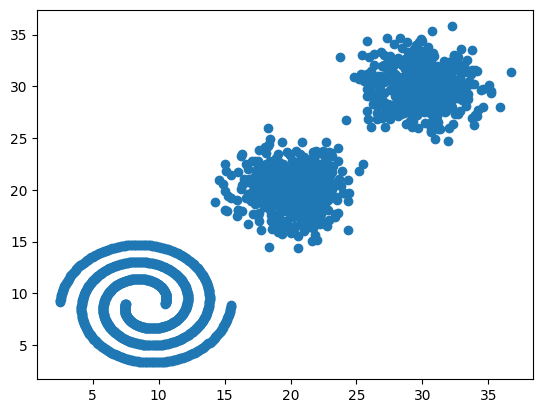

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1])
plt.show()

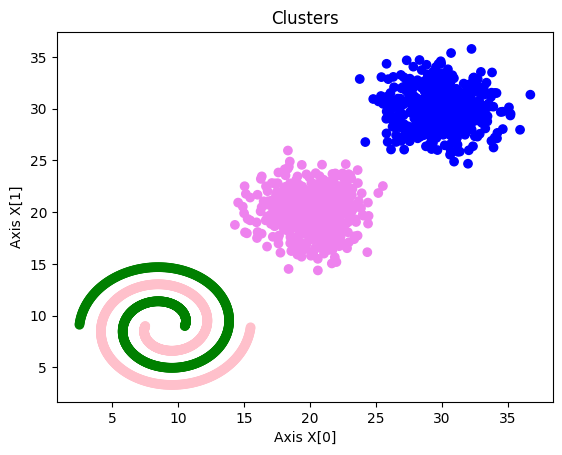

In [5]:
list_of_colors = ["red", "green", "pink", "violet", "blue", "lime", "orange", "yellow", "black", "gray"]

node_colors = list(map(lambda x: list_of_colors[x], data_labels))
plt.scatter(data[:, 0], data[:, 1], c=node_colors, marker="o", picker=True)
plt.title('Clusters')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

# part B

In [15]:
import math


def distance_function(vector1: np.ndarray, vector2: np.ndarray):
    return math.sqrt(np.sum(np.power(vector1 - vector2, 2)))

In [16]:
def find_neighbors(input_index, min_dist, DB: np.ndarray):
    m, n = DB.shape

    neighbors = []
    for i in range(m):
        if input_index == i:
            continue
        distance = distance_function(DB[input_index, :], DB[i, :])
        if distance < min_dist:
            neighbors.append(i)

    return neighbors


In [17]:
from tqdm import tqdm


def DBScan(X_train: np.ndarray, Epsilon, MinPoints):
    m, n = X_train.shape
    labels = np.zeros(m, dtype=int)  # zero is undefined

    C = 0

    for i in tqdm(range(m)):
        if labels[i] != 0:
            continue
        neighbors = find_neighbors(i, Epsilon, X_train)
        if len(neighbors) < MinPoints:
            labels[i] = -1  # -1 means noise it may change in the future
            continue

        C += 1
        labels[i] = C

        while len(neighbors) != 0:
            neighbor_index = neighbors.pop(0)

            if labels[neighbor_index] == -1:
                labels[neighbor_index] = C  # border node

            if labels[neighbor_index] != 0:
                continue

            labels[neighbor_index] = C

            new_neighbors = find_neighbors(neighbor_index, Epsilon, X_train)

            if len(new_neighbors) >= MinPoints:  # next hob neighbours
                neighbors.extend(new_neighbors)

    return labels

# Part C

In [23]:
list_of_colors = ["darkseagreen", "red", "green", "pink", "violet", "blue", "lime", "orange", "yellow", "black", "gray",
                  "coral", "greenyellow", "azure", "aqua", "salmon", "peru", "lightgreen", "palegreen", "linen",
                  "greenyellow", "olive", "powderblue", "darkcyan", "royalblue", "lightyellow", "black"]


# list_of_colors = ["darkseagreen", "red", "pink", "violet", "blue"]


def plot_shape(X_data, labels, plot_name="DB scan"):
    node_colors = list(map(lambda x: list_of_colors[x % len(list_of_colors)], labels))
    plt.scatter(X_data[:, 0], X_data[:, 1], c=node_colors, marker="o", picker=True)
    plt.title(plot_name)
    plt.xlabel('Axis X[0]')
    plt.ylabel('Axis X[1]')
    plt.show()

Dataset 1

In [12]:
file_name = "P3/D1.txt"
data, data_labels = load_data(file_name)

In [13]:
pred_labels = DBScan(data, 2, 3)
max(pred_labels)

100%|██████████| 2000/2000 [00:27<00:00, 73.37it/s]


3

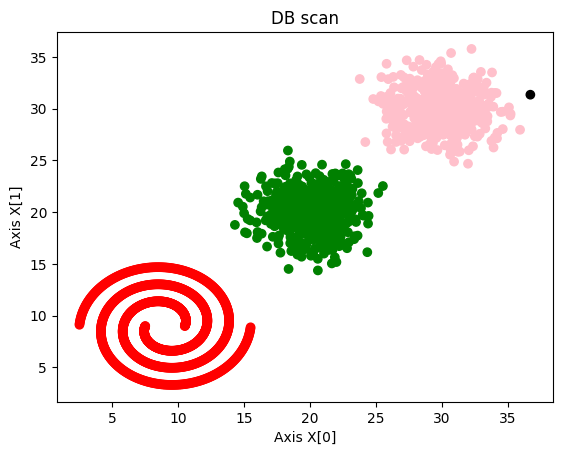

In [14]:
plot_shape(data, pred_labels)

Dataset 2

In [15]:
file_name = "P3/D2.txt"
data, data_labels = load_data(file_name)
pred_labels = DBScan(data, 7, 3)
max(pred_labels)

100%|██████████| 8000/8000 [05:04<00:00, 26.24it/s] 


47

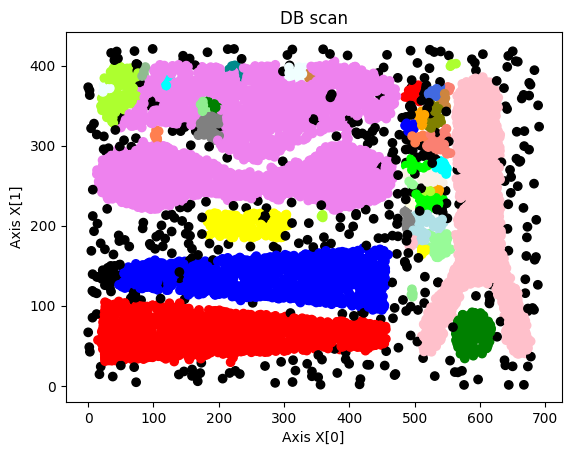

In [16]:
plot_shape(data, pred_labels)

Dataset 3

In [17]:
file_name = "P3/D3.txt"
data, data_labels = load_data(file_name)
pred_labels = DBScan(data, 0.4, 5)
max(pred_labels)

100%|██████████| 4600/4600 [01:38<00:00, 46.65it/s] 


26

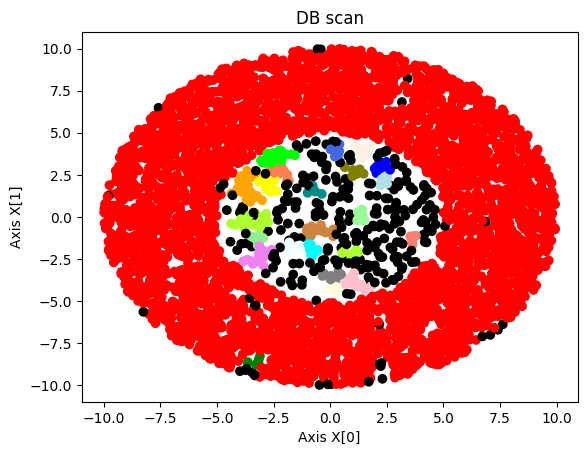

In [18]:
plot_shape(data, pred_labels)

Dataset 4

In [19]:
file_name = "P3/D4.txt"
data, data_labels = load_data(file_name)
pred_labels = DBScan(data, 4, 6)
max(pred_labels)

100%|██████████| 8000/8000 [04:56<00:00, 26.95it/s] 


21

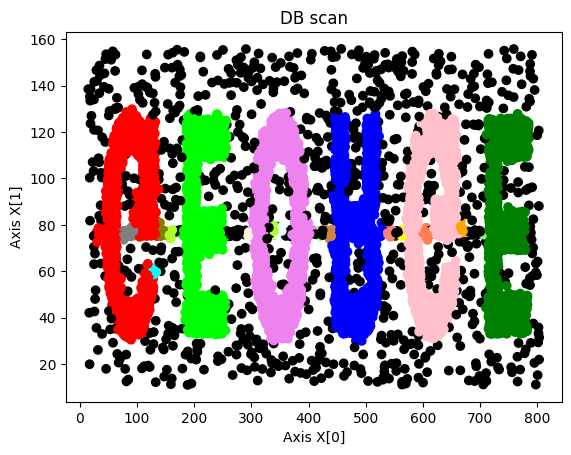

In [20]:
plot_shape(data, pred_labels)

Dataset 5

In [21]:
file_name = "P3/D5.txt"
data, data_labels = load_data(file_name)
pred_labels = DBScan(data, 1, 6)
max(pred_labels)

100%|██████████| 1500/1500 [00:10<00:00, 143.53it/s]


6

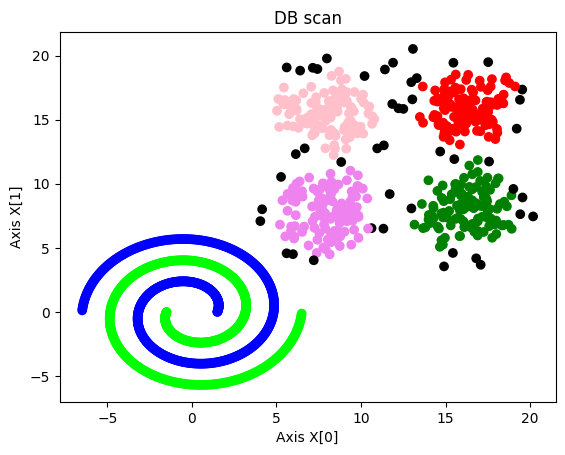

In [23]:
plot_shape(data, pred_labels)

# Part D

In [6]:
def find_closest(input_vector, DB: np.ndarray):
    m, n = DB.shape
    min = math.inf
    min_index = -1
    for i in range(m):
        distance = distance_function(input_vector, DB[i, :])
        if distance < min:
            min = distance
            min_index = i

    if min_index == -1:
        print("ERR => there is no min in distances")

    return min_index

In [7]:
def DBScanPredict(x_train, dbscan_cluster_labels, x_sample):
    results = []
    for sample in x_sample:
        closest_point_index = find_closest(sample, x_train)
        label = dbscan_cluster_labels[closest_point_index]
        results.append(label)
    return results


In [19]:
# this function calculated each cluster belong to which partition
def convert_DBscan_labels_to_real_labels(labels: list, true_labels: list):
    clusters = dict()
    for item_index in range(len(labels)):
        clusterset = clusters.get(labels[item_index], [])
        clusterset.append(true_labels[item_index])
        clusters[labels[item_index]] = clusterset

    clusters_convert_to = dict()

    for key in clusters.keys():
        vote_list = clusters[key]
        clusters_convert_to[key] = max(set(vote_list), key=vote_list.count)

    res = []
    for label in labels:
        res.append(clusters_convert_to[label])

    return res


# part E

In [9]:
# this function similar to part A just define as function
def load_data(file_name):
    data = []
    data_labels = []
    with open(file_name) as fp:
        Lines = fp.readlines()
        for line in Lines:
            if line.__contains__("%") or line.__contains__("@") or line.__eq__("\n"):
                continue
            line = line[:-1]
            parts = line.split(",")
            data.append([float(parts[0]), float(parts[1])])
            if parts[2] == "noise":
                data_labels.append(-1)
            else:
                data_labels.append(int(parts[2]))
    data = np.array(data)
    data_labels = np.array(data_labels)
    return data, data_labels

Data_set_1

In [41]:
file_name = "P3/D1.txt"
data, data_labels = load_data(file_name)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.15, random_state=55)

In [43]:
dbscan_cluster_labels = DBScan(X_train, 1, 3)

100%|██████████| 1700/1700 [00:14<00:00, 120.97it/s]


In [44]:
dbscan_cluster_labels = convert_DBscan_labels_to_real_labels(dbscan_cluster_labels, y_train)

In [45]:
pred = DBScanPredict(X_train, dbscan_cluster_labels, X_test)

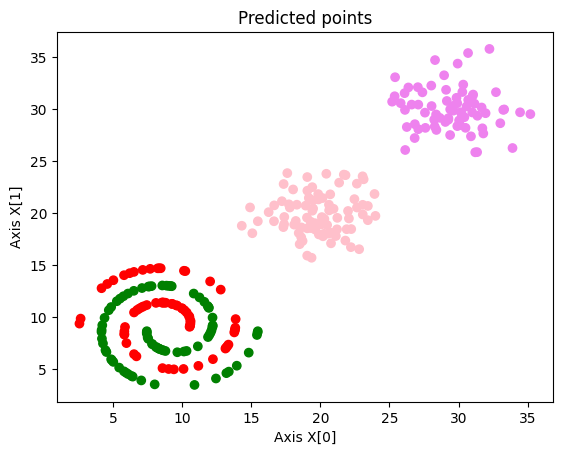

In [46]:
plot_shape(X_test,pred,"Predicted points")

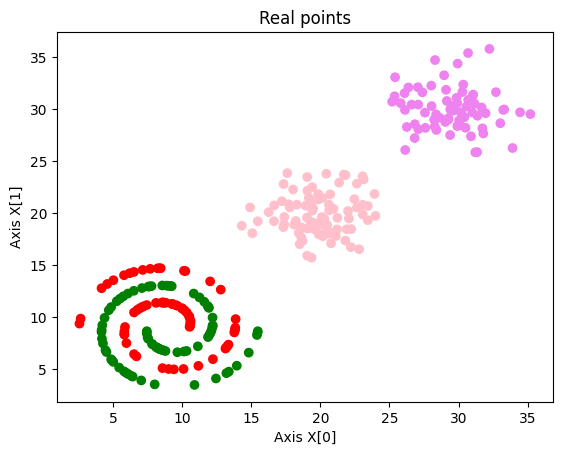

In [47]:
plot_shape(X_test,y_test,"Real points")

In [28]:
print(f'accuracy_score : {accuracy_score(y_test, pred)}')

accuracy_score : 1.0


Dataset 2

In [27]:
file_name = "P3/D2.txt"
data, data_labels = load_data(file_name)
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.15, random_state=55)
dbscan_cluster_labels = DBScan(X_train, 6, 3)

100%|██████████| 6800/6800 [03:41<00:00, 30.76it/s] 


In [28]:
dbscan_cluster_labels = convert_DBscan_labels_to_real_labels(dbscan_cluster_labels, y_train)
pred = DBScanPredict(X_train, dbscan_cluster_labels, X_test)

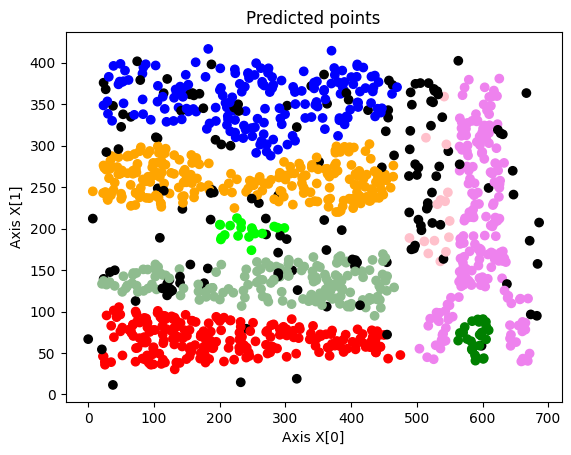

In [29]:
plot_shape(X_test,pred,"Predicted points")

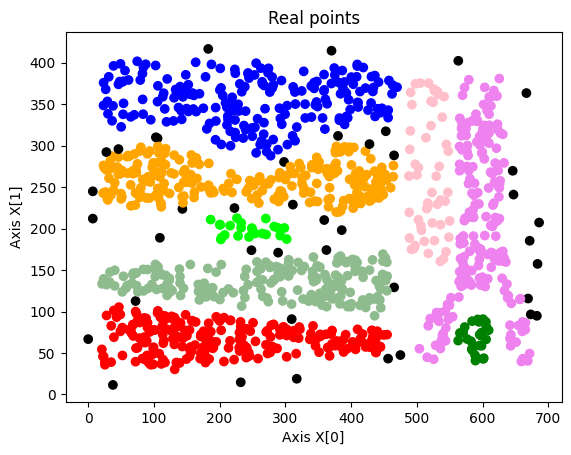

In [30]:
plot_shape(X_test,y_test,"Real points")

In [33]:
print(f'accuracy_score : {accuracy_score(y_test, pred)}')

accuracy_score : 0.8858333333333334


Dataset 3

In [31]:
file_name = "P3/D3.txt"
data, data_labels = load_data(file_name)
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.15, random_state=55)
dbscan_cluster_labels = DBScan(X_train, 0.4, 5)
dbscan_cluster_labels = convert_DBscan_labels_to_real_labels(dbscan_cluster_labels, y_train)
pred = DBScanPredict(X_train, dbscan_cluster_labels, X_test)

100%|██████████| 3910/3910 [01:13<00:00, 53.11it/s] 


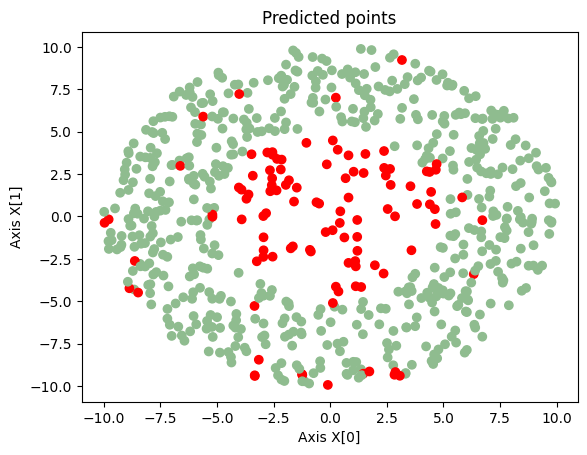

In [32]:
plot_shape(X_test, pred, "Predicted points")

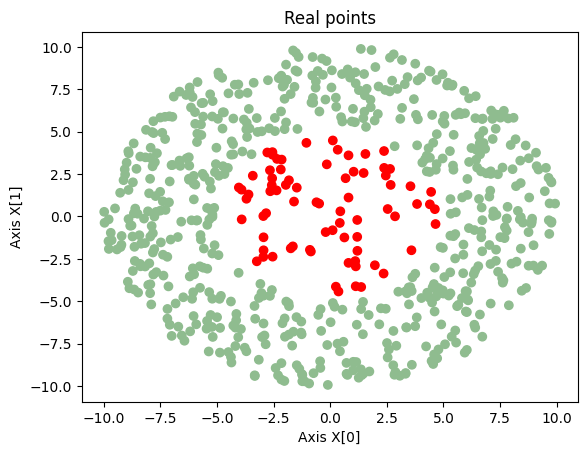

In [33]:
plot_shape(X_test, y_test, "Real points")

In [35]:
print(f'accuracy_score : {accuracy_score(y_test, pred)}')

100%|██████████| 3910/3910 [01:11<00:00, 54.86it/s] 


accuracy_score : 0.9521739130434783


Dataset 4

In [34]:
file_name = "P3/D4.txt"
data, data_labels = load_data(file_name)
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.15, random_state=55)
dbscan_cluster_labels = DBScan(X_train, 4, 6)
dbscan_cluster_labels = convert_DBscan_labels_to_real_labels(dbscan_cluster_labels, y_train)
pred = DBScanPredict(X_train, dbscan_cluster_labels, X_test)

100%|██████████| 6800/6800 [03:40<00:00, 30.80it/s] 


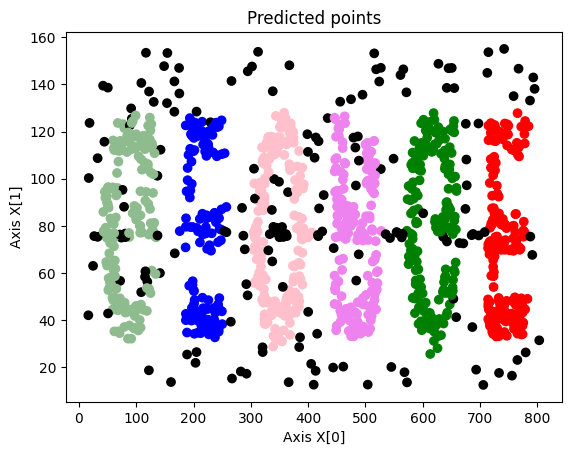

In [35]:
plot_shape(X_test, pred, "Predicted points")

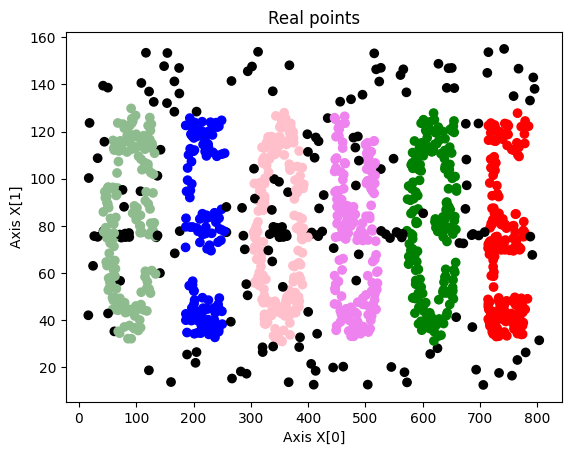

In [36]:
plot_shape(X_test, y_test, "Real points")

In [36]:
print(f'accuracy_score : {accuracy_score(y_test, pred)}')

100%|██████████| 6800/6800 [03:33<00:00, 31.85it/s] 


accuracy_score : 0.9775


Dataset 5

In [37]:
file_name = "P3/D5.txt"
data, data_labels = load_data(file_name)
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.15, random_state=55)
dbscan_cluster_labels = DBScan(X_train, 1, 6)
dbscan_cluster_labels = convert_DBscan_labels_to_real_labels(dbscan_cluster_labels, y_train)
pred = DBScanPredict(X_train, dbscan_cluster_labels, X_test)

100%|██████████| 1275/1275 [00:07<00:00, 159.87it/s]


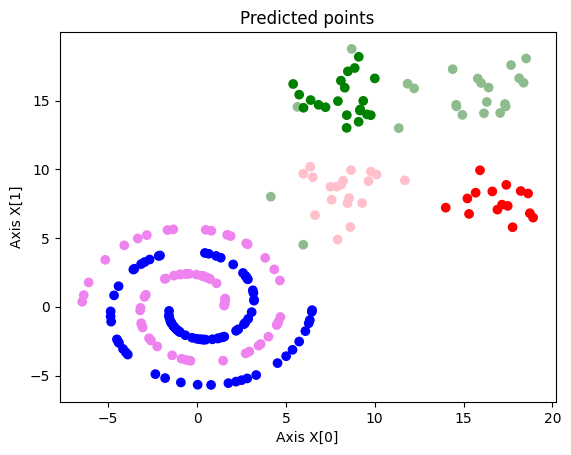

In [38]:
plot_shape(X_test, pred, "Predicted points")

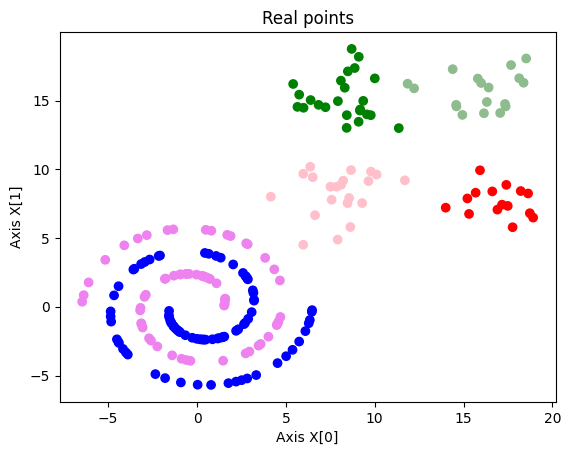

In [39]:
plot_shape(X_test, y_test, "Real points")

In [37]:
print(f'accuracy_score : {accuracy_score(y_test, pred)}')

100%|██████████| 1275/1275 [00:07<00:00, 169.66it/s]


accuracy_score : 0.9777777777777777


# Part F

In [40]:
# this function only accept one vector as input
def KNN(k, x_train: np.ndarray, labels, input: np.ndarray):
    m, n = x_train.shape
    dists = []
    for i in range(m):
        dist = distance_function(input, x_train[i, :])
        dists.append((dist, i))

    dists = sorted(dists)
    dists = dists[:k]  # select k nearest

    votes = []
    for i in range(len(dists)):
        node_id = dists[i][1]
        votes.append(labels[node_id])

    result = max(set(votes), key=votes.count)
    return result

In [41]:
def KNN_for_multi_input(k, x_train: np.ndarray, labels, inputs: np.ndarray):
    m , _ = inputs.shape
    results = []
    for i in range(m):
        result = KNN(k, x_train, labels, inputs[i,:])
        results.append(result)
    return results

Data set 1

In [50]:
file_name = "P3/D1.txt"
data, data_labels = load_data(file_name)
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.15, random_state=55)
preds = KNN_for_multi_input(3,X_train,y_train,X_test)
print(f'3NN accuracy_score : {accuracy_score(y_test, preds)}')

3NN accuracy_score : 1.0


In [51]:
preds = KNN_for_multi_input(5,X_train,y_train,X_test)
print(f'5NN accuracy_score : {accuracy_score(y_test, preds)}')

5NN accuracy_score : 1.0


Data set2

In [52]:
file_name = "P3/D2.txt"
data, data_labels = load_data(file_name)
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.15, random_state=55)
preds = KNN_for_multi_input(3,X_train,y_train,X_test)
print(f'3NN accuracy_score : {accuracy_score(y_test, preds)}')

3NN accuracy_score : 0.9866666666666667


In [53]:
preds = KNN_for_multi_input(5,X_train,y_train,X_test)
print(f'5NN accuracy_score : {accuracy_score(y_test, preds)}')

5NN accuracy_score : 0.9808333333333333


Data set3

In [54]:
file_name = "P3/D3.txt"
data, data_labels = load_data(file_name)
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.15, random_state=55)
preds = KNN_for_multi_input(3,X_train,y_train,X_test)
print(f'3NN accuracy_score : {accuracy_score(y_test, preds)}')

3NN accuracy_score : 1.0


In [55]:
preds = KNN_for_multi_input(5,X_train,y_train,X_test)
print(f'5NN accuracy_score : {accuracy_score(y_test, preds)}')

5NN accuracy_score : 0.9985507246376811


Data set 4

In [56]:
file_name = "P3/D4.txt"
data, data_labels = load_data(file_name)
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.15, random_state=55)
preds = KNN_for_multi_input(3,X_train,y_train,X_test)
print(f'3NN accuracy_score : {accuracy_score(y_test, preds)}')

3NN accuracy_score : 0.9775


In [57]:
preds = KNN_for_multi_input(5,X_train,y_train,X_test)
print(f'5NN accuracy_score : {accuracy_score(y_test, preds)}')

5NN accuracy_score : 0.9716666666666667


Data set 5

In [58]:
file_name = "P3/D5.txt"
data, data_labels = load_data(file_name)
X_train, X_test, y_train, y_test = train_test_split(data, data_labels, test_size=0.15, random_state=55)
preds = KNN_for_multi_input(3,X_train,y_train,X_test)
print(f'3NN accuracy_score : {accuracy_score(y_test, preds)}')

3NN accuracy_score : 1.0


In [59]:
preds = KNN_for_multi_input(5,X_train,y_train,X_test)
print(f'5NN accuracy_score : {accuracy_score(y_test, preds)}')

5NN accuracy_score : 0.9955555555555555
